
# Interpolations

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 15 }
plt.rc('font', **font)

In [3]:
number_original_images = 2

In [4]:
number_interpolated_images = 3

In [5]:
rate_interpolation = float(number_interpolated_images / number_original_images)
rate_interpolation

1.5

In [6]:
def create_originals(number_original_images, rate_interpolation):
    return { i: rate_interpolation for i in range(number_original_images)}

create_originals(number_original_images, rate_interpolation)

{0: 1.5, 1: 1.5}

In [7]:
def create_weights(number_original_images, number_interpolated_images):
    weights = {} 
    for i in range(number_interpolated_images):
        weights.setdefault(i, {})
        for j in range(number_original_images):
            weights[i][j] = 0
    return weights

create_weights(number_original_images, number_interpolated_images)

{0: {0: 0, 1: 0}, 1: {0: 0, 1: 0}, 2: {0: 0, 1: 0}}

In [8]:
def distribute(number_original_images, number_interpolated_images):

    rate_interpolation = float(number_interpolated_images / number_original_images)
    print('Rate of interpolation: {}'.format(rate_interpolation))
    
    originals = create_originals(number_original_images, rate_interpolation)
    weights = create_weights(number_original_images, number_interpolated_images)

    for i in range(number_interpolated_images):

        # Reset weight to distribute
        weight_to_distribute = 1

        # find the index that still has to share
        j = 0
        while originals[j] == 0:
            j += 1

        while weight_to_distribute > 0 and j < len(originals) :

            som = min(weight_to_distribute, originals[j])

            weights[i][j] = som
            originals[j] -= som
            weight_to_distribute -= som

            if originals[j] == 0: j += 1

    return weights

In [9]:
distribute(number_original_images, number_interpolated_images)

Rate of interpolation: 1.5


{0: {0: 1, 1: 0}, 1: {0: 0.5, 1: 0.5}, 2: {0: 0, 1: 1}}

In [10]:
distribute(number_original_images=10, number_interpolated_images=5)

Rate of interpolation: 0.5


{0: {0: 0.5, 1: 0.5, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 1: {0: 0, 1: 0, 2: 0.5, 3: 0.5, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 2: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0.5, 5: 0.5, 6: 0, 7: 0, 8: 0, 9: 0},
 3: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0.5, 7: 0.5, 8: 0, 9: 0},
 4: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0.5, 9: 0.5}}

In [11]:
distribute(number_original_images=5, number_interpolated_images=4)

Rate of interpolation: 0.8


{0: {0: 0.8, 1: 0.19999999999999996, 2: 0, 3: 0, 4: 0},
 1: {0: 0, 1: 0.6000000000000001, 2: 0.3999999999999999, 3: 0, 4: 0},
 2: {0: 0, 1: 0, 2: 0.40000000000000013, 3: 0.5999999999999999, 4: 0},
 3: {0: 0, 1: 0, 2: 0, 3: 0.20000000000000018, 4: 0.7999999999999998}}

In [12]:
distribute(number_original_images=5, number_interpolated_images=1)

Rate of interpolation: 0.2


{0: {0: 0.2, 1: 0.2, 2: 0.2, 3: 0.2, 4: 0.2}}

In [13]:
distribute(number_original_images=5, number_interpolated_images=5)

Rate of interpolation: 1.0


{0: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0},
 1: {0: 0, 1: 1, 2: 0, 3: 0, 4: 0},
 2: {0: 0, 1: 0, 2: 1, 3: 0, 4: 0},
 3: {0: 0, 1: 0, 2: 0, 3: 1, 4: 0},
 4: {0: 0, 1: 0, 2: 0, 3: 0, 4: 1}}

In [14]:
w = distribute(5, 4)

Rate of interpolation: 0.8


In [15]:
w

{0: {0: 0.8, 1: 0.19999999999999996, 2: 0, 3: 0, 4: 0},
 1: {0: 0, 1: 0.6000000000000001, 2: 0.3999999999999999, 3: 0, 4: 0},
 2: {0: 0, 1: 0, 2: 0.40000000000000013, 3: 0.5999999999999999, 4: 0},
 3: {0: 0, 1: 0, 2: 0, 3: 0.20000000000000018, 4: 0.7999999999999998}}

In [16]:
def weights_on_heatmap(number_original_images, number_interpolated_images, weights, figsize=(12, 15), image_name=''):
    
    matrix = []
    for row in list(weights.values()):
        cols = [ row[i] for i in range(number_original_images) ]
        matrix.append(cols)

    matrix = np.array(matrix)
    
    # image_annotated_heatmap
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(matrix, cmap="Blues")

    # ticks
    ax.set_xticks(np.arange(number_original_images))
    ax.set_yticks(np.arange(number_interpolated_images))
    # tick labels
    ax.set_xticklabels([ 'Original Image {}'.format(i + 1) for i in range(number_original_images) ])
    ax.set_yticklabels([ 'Interpolated Image {}'.format(i + 1) for i in range(number_interpolated_images) ])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(number_interpolated_images):
        for j in range(number_original_images):
            text = ax.text(j, i, '{:.2f}'.format(matrix[i, j]), ha="center", va="center", color="w")

    ax.set_title("Number of original images: {}, Number of interpolated imates: {}".format(
        number_original_images, number_interpolated_images))
    fig.tight_layout()
    
    if image_name != '': plt.savefig(image_name, bbox_inches="tight")

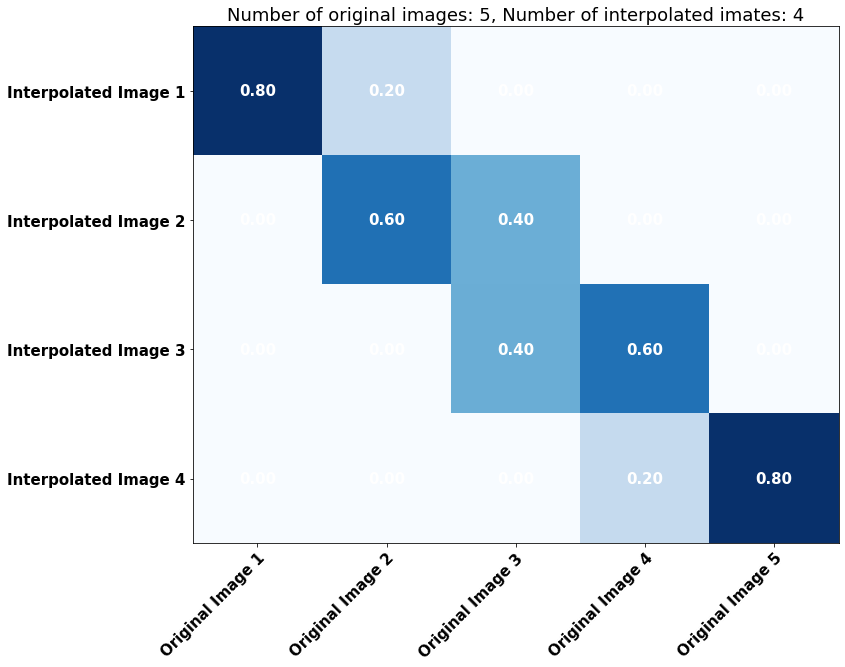

In [17]:
weights_on_heatmap(5, 4, w, image_name='../../figures/interpolation_weights_5_image_to_4.png')

Rate of interpolation: 1.0


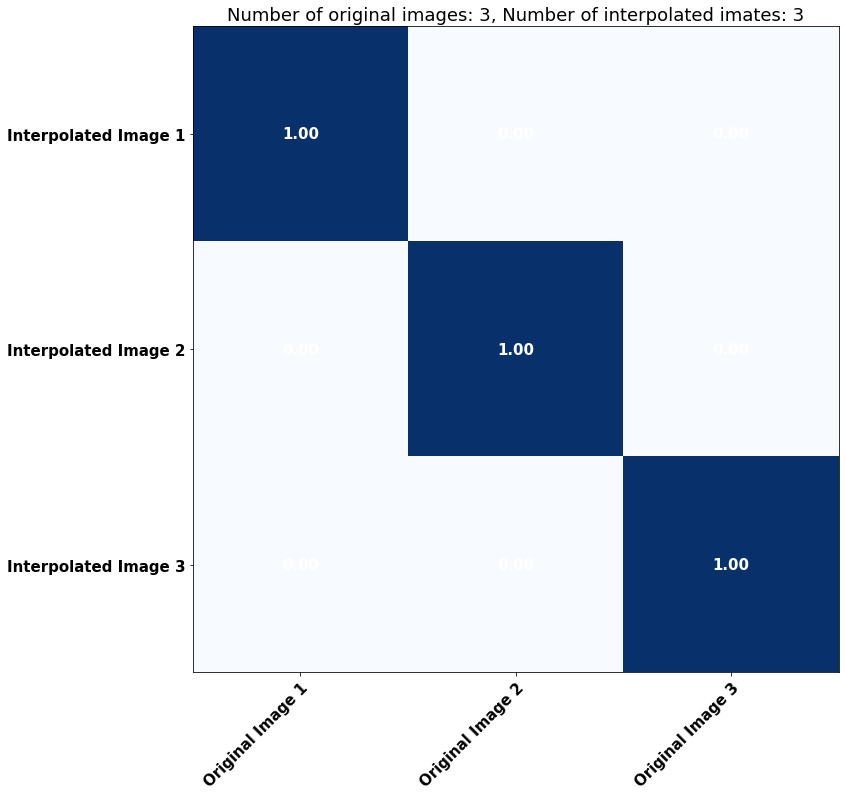

In [18]:
_num_orig = 3
_num_interp = 3
weights_on_heatmap(_num_orig, _num_interp, distribute(_num_orig, _num_interp))

Rate of interpolation: 0.5


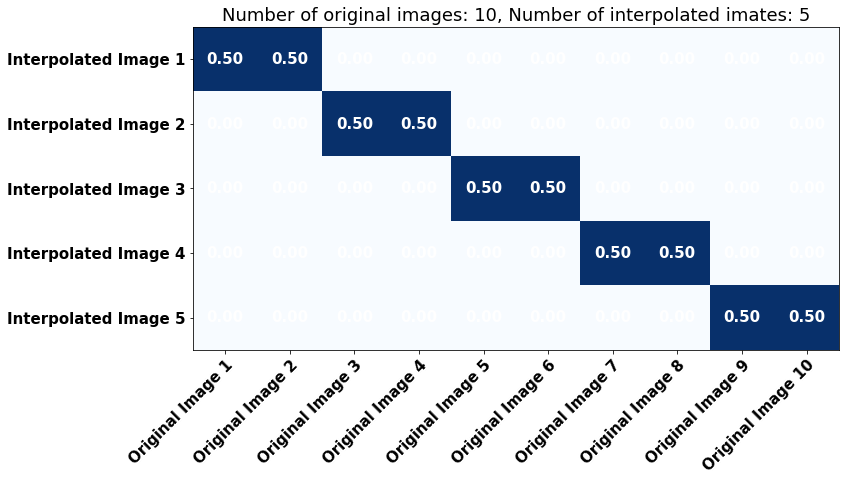

In [19]:
_num_orig = 10
_num_interp = 5
weights_on_heatmap(_num_orig, _num_interp, distribute(_num_orig, _num_interp), 
                   image_name='../../figures/interpolation_weights_10_image_to_5.png')

In [20]:
_num_orig = 60
_num_interp = 40
w = distribute(_num_orig, _num_interp)

Rate of interpolation: 0.6666666666666666


In [21]:
_num_orig = 1
_num_interp = 2
distribute(_num_orig, _num_interp)

Rate of interpolation: 2.0


{0: {0: 1}, 1: {0: 1}}

Rate of interpolation: 2.5


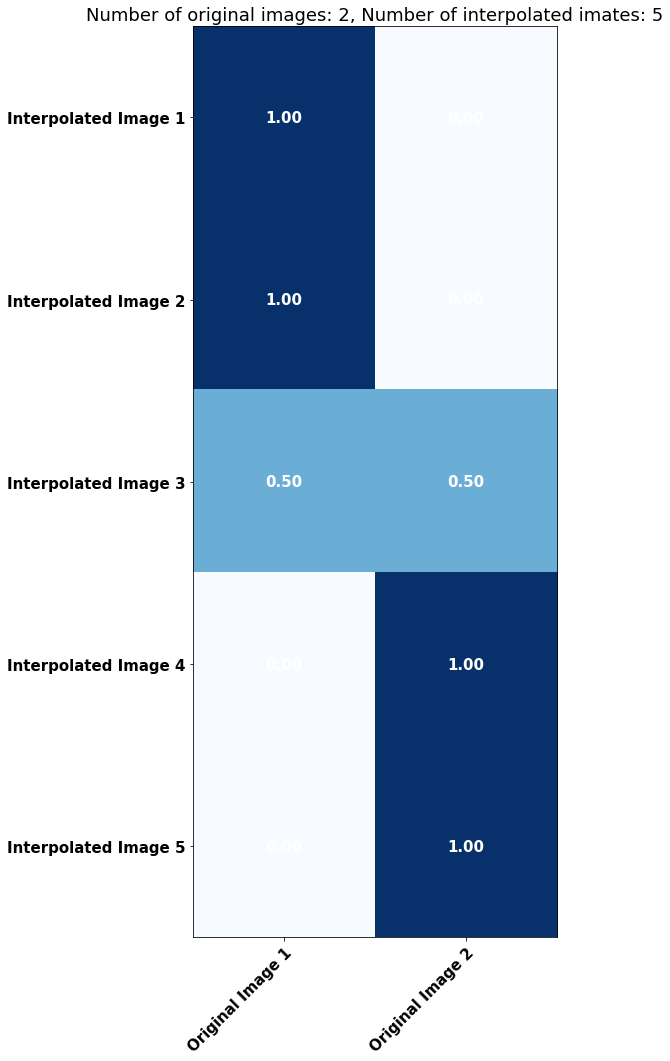

In [22]:
_num_orig = 2
_num_interp = 5
weights_on_heatmap(_num_orig, _num_interp, distribute(_num_orig, _num_interp), 
                   image_name='../../figures/interpolation_weights_2_image_to_5.png')